# Logistic Regression

Logistic Regression is nothing it is extention of linear Regression that gives output 0 or 1.
Logistic Regression produce result binary. 
It is used to predict the outcome of categorical value that have 1 or 2 features. 
Output of the regression model will be 0 and 1, Yes and No, High and Low, Pass and Fail etc.
To evaluate the performance of the model we use few metrics. 1 is Confusion matrics.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv('social_network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
y=dataset['Purchased']
X=dataset.drop(['Purchased','User ID','Gender'],axis =1)
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 2)
(266,)
(134, 2)
(134,)


In [23]:
# Feature Selection
# as in our data age and income is not in same scale.
# so first we convert and come in same scale here we are using min max standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train[0:6,])



[[ 0.81203707  0.7926083 ]
 [-0.96332069 -0.30625786]
 [ 0.12162016  0.7926083 ]
 [-0.96332069  0.5847147 ]
 [ 0.31888214  0.07983025]
 [ 0.71340608 -1.28632769]]


In [24]:
# You can see on the above that our data is now in have standarized form.

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Predicting the Test set results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

y_testpred = classifier.predict(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 2)
(266,)
(134, 2)
(134,)


Text(0, 0.5, 'Status (1:Won, 0:Lost)')

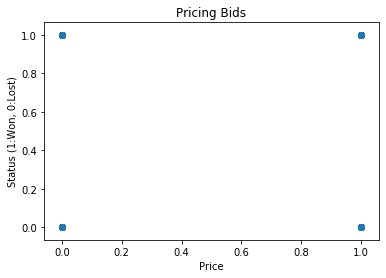

In [70]:

plt.scatter(y_testpred,y_test)
plt.title("Pricing Bids")
plt.xlabel('Price')
plt.ylabel('Status (1:Won, 0:Lost)')

In [33]:
df2=pd.DataFrame(y_testpred,y_test)
df2.head(20)

,0
Purchased,
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0


In [32]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_testpred)
cm

array([[79,  6],
       [11, 38]])